# LAB 1 - DECISION TREES - (23.12.24)

## AIM
To apply decision tree to the Load Wine Dataset is to classify wine samples based on their chemical properties (e.g., alcohol content, malic acid, ash, etc.) into distinct wine categories and evaluate the model's perfomance using `classification_report`,visualise and interpret the model's decision making process. 

## ALGORITHM

1. **Load Data:**
   - Load the Wine dataset (features `X` and target labels `y`).
   -  Visualise the dataset using `Dat

2. **Split Data:**
   - Split the dataset into training and testing sets (e.g., 70% training, 30% testing).

3. **Train Decision Tree:**
   - Create a `DecisionTreeClassifier` model.
   - Fit the model on the training data.

4. **Make Predictions:**
   - Predict labels for the test set using the trained model.

5. **Evaluate Model:**
   - Print classification report: `classification_report(y_test, y_pred)`, from which evaluation metrics like precision,recall, and accuracy are returned.

6. **Visualize Decision Tree:**
   - Use `plot_tree(model, filled=True, feature_names, class_names)` to plot the decision tree.

## DESCRIPTION

A **Decision Tree** is a supervised machine learning algorithm used for classification and regression tasks. It splits data into subsets based on feature values, creating a tree-like structure with decision nodes and leaf nodes. Each decision node represents a feature used to split the data, while leaf nodes contain the final prediction. The algorithm selects the best feature to split the data using criteria like Gini impurity or entropy, recursively creating branches until a stopping condition is met. They are easy to interpret and handle both numerical and categorical data but can suffer from overfitting, especially with deep trees, and can be unstable with noisy data.

## CODE AND OUTPUT

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

In [25]:
df = pd.DataFrame(load_wine()['data'],columns=load_wine()['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [26]:
X,y = load_wine(return_X_y=True)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=102,criterion='gini')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=102)

In [30]:
from sklearn.metrics import classification_report
y_pred = classifer.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



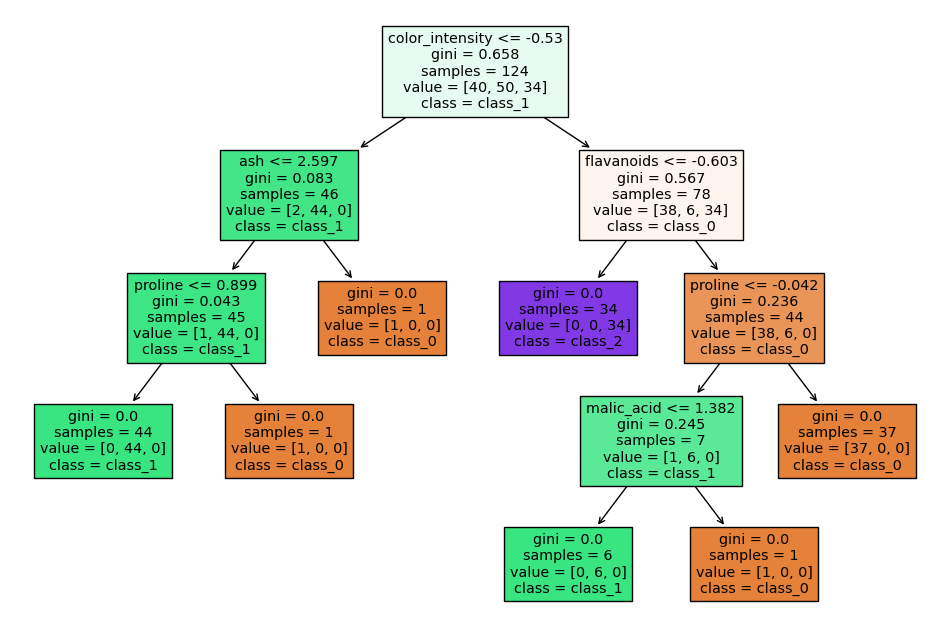

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=load_wine().feature_names, class_names=load_wine().target_names)
plt.show()

## RESULT

A decision tree classifier has been trained on the wine dataset with an accuracy of 96%.